In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import platform
import os
import glob

pd.set_option('display.float_format',"{:.2f}".format)

# OS에 따라 다른 폰트 지정
if platform.system() == 'Darwin':   # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux (예: Colab, Ubuntu)
    plt.rcParams['font.family'] = 'NanumGothic'

mpl.rcParams['axes.unicode_minus'] = False

file_path = "../../../dataset/seoul_real_estate_dataset/2024.csv" ## 자기 경로로 바꾸기
whole_df = pd.read_csv(file_path,encoding='cp949', parse_dates=["계약일","취소일"])

/var/folders/t1/q06mfd155s9gxyx6fqq13yjc0000gn/T/ipykernel_179/1704901211.py:26: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  whole_df = pd.read_csv(file_path,encoding='cp949', parse_dates=["계약일","취소일"])


In [ ]:
!pip install scikit-learn

In [5]:
from sklearn.preprocessing import StandardScaler

## 확률 분포 그려보기

In [6]:
df = whole_df[['건물명','자치구코드', '자치구명', '법정동코드', '법정동명','층','건물용도','물건금액(만원)', '건물면적(㎡)', '토지면적(㎡)','계약일']]
df.columns = ['건물명','자치구코드', '자치구명', '법정동코드', '법정동명','층','건물용도','물건금액', '건물면적', '토지면적','계약일']

In [7]:
df.dropna(inplace=True)

/var/folders/t1/q06mfd155s9gxyx6fqq13yjc0000gn/T/ipykernel_179/1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [10]:
df.describe()

,자치구코드,법정동코드,층,물건금액,건물면적,토지면적,계약일
count,69886.00,69886.00,69886.00,69886.00,69886.00,69886.00,69886
mean,11458.72,10928.45,7.75,84213.44,62.23,14.01,2024-05-30 05:08:49.651146240
min,11110.00,10100.00,-2.00,2600.00,8.48,0.00,2022-07-08 00:00:00
25%,11305.00,10200.00,3.00,30000.00,40.20,0.00,2024-03-31 00:00:00
50%,11470.00,10600.00,6.00,62000.00,59.85,0.00,2024-06-13 00:00:00
75%,11620.00,11000.00,11.00,110000.00,84.77,25.40,2024-07-27 00:00:00
max,11740.00,18700.00,68.00,2200000.00,288.40,30822.00,2024-10-14 00:00:00
std,177.45,1199.78,6.30,80280.77,29.74,118.68,NaN


         자치구코드    법정동코드        층       물건금액     건물면적     토지면적  \
count 69886.00 69886.00 69886.00   69886.00 69886.00 69886.00   
mean  11458.72 10928.45     7.75   84213.44    62.23    14.01   
min   11110.00 10100.00    -2.00    2600.00     8.48     0.00   
25%   11305.00 10200.00     3.00   30000.00    40.20     0.00   
50%   11470.00 10600.00     6.00   62000.00    59.85     0.00   
75%   11620.00 11000.00    11.00  110000.00    84.77    25.40   
max   11740.00 18700.00    68.00 2200000.00   288.40 30822.00   
std     177.45  1199.78     6.30   80280.77    29.74   118.68   

                                 계약일  
count                          69886  
mean   2024-05-30 05:08:49.651146240  
min              2022-07-08 00:00:00  
25%              2024-03-31 00:00:00  
50%              2024-06-13 00:00:00  
75%              2024-07-27 00:00:00  
max              2024-10-14 00:00:00  
std                              NaN  

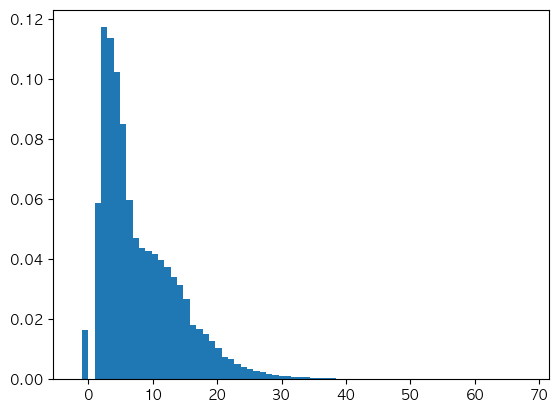

<Figure size 640x480 with 1 Axes>

In [12]:
plt.hist(df['층'],bins=71,density=True)
plt.show()

In [14]:
df['층'].value_counts(normalize=True)

층
2.00    0.12
3.00    0.11
4.00    0.10
5.00    0.08
6.00    0.06
        ... 
60.00   0.00
52.00   0.00
67.00   0.00
63.00   0.00
64.00   0.00
Name: proportion, Length: 61, dtype: float64

2024년 거래된 매물 중에서 2층이 차지하는 비율은 약 12%에 달한다

2024년에 거래된 매물 중에서 아무거나 1개를 선택했을 때, 2층일 확률이 12%이다. 

## 표준화

In [16]:
multiplex_house_df = df.loc[df['건물용도']=='연립다세대']

In [18]:
multiplex_house_df.describe()

,자치구코드,법정동코드,층,물건금액,건물면적,토지면적,계약일
count,21183.00,21183.00,21183.00,21183.00,21183.00,21183.00,21183
mean,11443.34,10850.47,3.03,35977.08,45.19,29.49,2024-05-18 17:43:36.003398912
min,11110.00,10100.00,-2.00,2600.00,8.48,3.00,2022-07-08 00:00:00
25%,11305.00,10200.00,2.00,22300.00,29.93,19.00,2024-03-15 00:00:00
50%,11440.00,10500.00,3.00,30000.00,43.02,25.00,2024-05-23 00:00:00
75%,11590.00,10900.00,4.00,40500.00,55.43,32.00,2024-07-26 00:00:00
max,11740.00,18700.00,18.00,1085000.00,288.40,30822.00,2024-10-14 00:00:00
std,168.33,1156.70,1.88,32384.91,19.72,212.72,NaN


         자치구코드    법정동코드        층       물건금액     건물면적     토지면적  \
count 21183.00 21183.00 21183.00   21183.00 21183.00 21183.00   
mean  11443.34 10850.47     3.03   35977.08    45.19    29.49   
min   11110.00 10100.00    -2.00    2600.00     8.48     3.00   
25%   11305.00 10200.00     2.00   22300.00    29.93    19.00   
50%   11440.00 10500.00     3.00   30000.00    43.02    25.00   
75%   11590.00 10900.00     4.00   40500.00    55.43    32.00   
max   11740.00 18700.00    18.00 1085000.00   288.40 30822.00   
std     168.33  1156.70     1.88   32384.91    19.72   212.72   

                                 계약일  
count                          21183  
mean   2024-05-18 17:43:36.003398912  
min              2022-07-08 00:00:00  
25%              2024-03-15 00:00:00  
50%              2024-05-23 00:00:00  
75%              2024-07-26 00:00:00  
max              2024-10-14 00:00:00  
std                              NaN  

In [22]:
# IQR 방식의 이상치 제거
area_data = multiplex_house_df['토지면적'].values
q_1 = np.percentile(area_data, q=25)
q_3 = np.percentile(area_data,q=75)
iqr = q_3 - q_1

In [24]:
lower_whisker = q_1 - 1.5 * iqr 
upper_whisker = q_3 + 1.5 * iqr

In [26]:
# 이상치 제거한 데이터 나오게끔 해보기! 

multiplex_house_df_cleaned = multiplex_house_df.loc[multiplex_house_df['토지면적'].between(lower_whisker,upper_whisker)]
# multiplex_house_df_cleaned = multiplex_house_df.loc[(multiplex_house_df['토지면적']>=lower_whisker)&(multiplex_house_df['토지면적']<=upper_whisker)]

In [27]:
multiplex_house_df_cleaned

,건물명,자치구코드,자치구명,법정동코드,법정동명,층,건물용도,물건금액,건물면적,토지면적,계약일
0,성원빌라(86-125),11380,은평구,10200,녹번동,4.00,연립다세대,16400,53.07,25.00,2024-10-14
1,팔팔빌라,11500,강서구,10300,화곡동,2.00,연립다세대,35000,39.24,27.00,2024-10-14
2,다솔시티하임,11560,영등포구,11100,당산동1가,5.00,연립다세대,30000,29.54,14.00,2024-10-14
9,진광,11500,강서구,10600,내발산동,1.00,연립다세대,15900,37.98,20.00,2024-10-14
11,오복홈타운,11590,동작구,10200,상도동,2.00,연립다세대,30000,62.30,43.00,2024-10-14
...,...,...,...,...,...,...,...,...,...,...,...
77505,그레이스빌2차A,11440,마포구,12200,합정동,5.00,연립다세대,26300,22.44,12.65,2023-11-13
77509,(243-9),11170,용산구,13000,이태원동,1.00,연립다세대,39100,40.48,36.00,2023-08-30
77512,가온리치빌(씨동),11305,강북구,10300,수유동,2.00,연립다세대,23000,29.64,21.54,2023-04-07
77513,(410-23),11440,마포구,12300,망원동,2.00,연립다세대,20000,23.82,16.00,2023-03-13


                건물명  자치구코드  자치구명  법정동코드   법정동명    층   건물용도   물건금액  건물면적  토지면적  \
0      성원빌라(86-125)  11380   은평구  10200    녹번동 4.00  연립다세대  16400 53.07 25.00   
1              팔팔빌라  11500   강서구  10300    화곡동 2.00  연립다세대  35000 39.24 27.00   
2            다솔시티하임  11560  영등포구  11100  당산동1가 5.00  연립다세대  30000 29.54 14.00   
9                진광  11500   강서구  10600   내발산동 1.00  연립다세대  15900 37.98 20.00   
11            오복홈타운  11590   동작구  10200    상도동 2.00  연립다세대  30000 62.30 43.00   
...             ...    ...   ...    ...    ...  ...    ...    ...   ...   ...   
77505      그레이스빌2차A  11440   마포구  12200    합정동 5.00  연립다세대  26300 22.44 12.65   
77509       (243-9)  11170   용산구  13000   이태원동 1.00  연립다세대  39100 40.48 36.00   
77512     가온리치빌(씨동)  11305   강북구  10300    수유동 2.00  연립다세대  23000 29.64 21.54   
77513      (410-23)  11440   마포구  12300    망원동 2.00  연립다세대  20000 23.82 16.00   
77516  세종에버그린(101동)  11215   광진구  10700    화양동 8.00  연립다세대  30000 27.55  9.88   

             계약일  
0     20

In [28]:
# 오복홈타운의 데이터 확인하기 
multiplex_house_df_cleaned.loc[multiplex_house_df_cleaned['건물명']=='오복홈타운']

,건물명,자치구코드,자치구명,법정동코드,법정동명,층,건물용도,물건금액,건물면적,토지면적,계약일
11,오복홈타운,11590,동작구,10200,상도동,2.00,연립다세대,30000,62.30,43.00,2024-10-14


      건물명  자치구코드 자치구명  법정동코드 법정동명    층   건물용도   물건금액  건물면적  토지면적        계약일
11  오복홈타운  11590  동작구  10200  상도동 2.00  연립다세대  30000 62.30 43.00 2024-10-14

- 연립다세대주택 중에서 오복홈타운의 건물 면적과 토지면적은 높은 편일까? 
  => 평균보다 높은가? 
- 만약 둘 다 평균보다 높다고 나온다면, 오복홈타운의 건물면적과 토지면적 중 어떤 면적이 평균에서 더 멀리 떨어져있을까?

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

multiplex_house_df_cleaned['건물면적_표준화']=  scaler.fit_transform(multiplex_house_df_cleaned[['건물면적']])
multiplex_house_df_cleaned['토지면적_표준화']=  scaler.fit_transform(multiplex_house_df_cleaned[['토지면적']])

In [36]:
multiplex_house_df_cleaned

,건물명,자치구코드,자치구명,법정동코드,법정동명,층,건물용도,물건금액,건물면적,토지면적,계약일,건물면적_표준화,토지면적_표준화
0,성원빌라(86-125),11380,은평구,10200,녹번동,4.00,연립다세대,16400,53.07,25.00,2024-10-14,0.63,-0.02
1,팔팔빌라,11500,강서구,10300,화곡동,2.00,연립다세대,35000,39.24,27.00,2024-10-14,-0.26,0.21
2,다솔시티하임,11560,영등포구,11100,당산동1가,5.00,연립다세대,30000,29.54,14.00,2024-10-14,-0.89,-1.28
9,진광,11500,강서구,10600,내발산동,1.00,연립다세대,15900,37.98,20.00,2024-10-14,-0.34,-0.59
11,오복홈타운,11590,동작구,10200,상도동,2.00,연립다세대,30000,62.30,43.00,2024-10-14,1.23,2.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77505,그레이스빌2차A,11440,마포구,12200,합정동,5.00,연립다세대,26300,22.44,12.65,2023-11-13,-1.35,-1.44
77509,(243-9),11170,용산구,13000,이태원동,1.00,연립다세대,39100,40.48,36.00,2023-08-30,-0.18,1.25
77512,가온리치빌(씨동),11305,강북구,10300,수유동,2.00,연립다세대,23000,29.64,21.54,2023-04-07,-0.88,-0.41
77513,(410-23),11440,마포구,12300,망원동,2.00,연립다세대,20000,23.82,16.00,2023-03-13,-1.26,-1.05


                건물명  자치구코드  자치구명  법정동코드   법정동명    층   건물용도   물건금액  건물면적  토지면적  \
0      성원빌라(86-125)  11380   은평구  10200    녹번동 4.00  연립다세대  16400 53.07 25.00   
1              팔팔빌라  11500   강서구  10300    화곡동 2.00  연립다세대  35000 39.24 27.00   
2            다솔시티하임  11560  영등포구  11100  당산동1가 5.00  연립다세대  30000 29.54 14.00   
9                진광  11500   강서구  10600   내발산동 1.00  연립다세대  15900 37.98 20.00   
11            오복홈타운  11590   동작구  10200    상도동 2.00  연립다세대  30000 62.30 43.00   
...             ...    ...   ...    ...    ...  ...    ...    ...   ...   ...   
77505      그레이스빌2차A  11440   마포구  12200    합정동 5.00  연립다세대  26300 22.44 12.65   
77509       (243-9)  11170   용산구  13000   이태원동 1.00  연립다세대  39100 40.48 36.00   
77512     가온리치빌(씨동)  11305   강북구  10300    수유동 2.00  연립다세대  23000 29.64 21.54   
77513      (410-23)  11440   마포구  12300    망원동 2.00  연립다세대  20000 23.82 16.00   
77516  세종에버그린(101동)  11215   광진구  10700    화양동 8.00  연립다세대  30000 27.55  9.88   

             계약일  건물면적_표준화 

In [39]:
target = multiplex_house_df_cleaned.loc[multiplex_house_df_cleaned['건물명']=='오복홈타운']
target

,건물명,자치구코드,자치구명,법정동코드,법정동명,층,건물용도,물건금액,건물면적,토지면적,계약일,건물면적_표준화,토지면적_표준화
11,오복홈타운,11590,동작구,10200,상도동,2.00,연립다세대,30000,62.30,43.00,2024-10-14,1.23,2.05


      건물명  자치구코드 자치구명  법정동코드 법정동명    층   건물용도   물건금액  건물면적  토지면적        계약일  \
11  오복홈타운  11590  동작구  10200  상도동 2.00  연립다세대  30000 62.30 43.00 2024-10-14   

    건물면적_표준화  토지면적_표준화  
11      1.23      2.05  

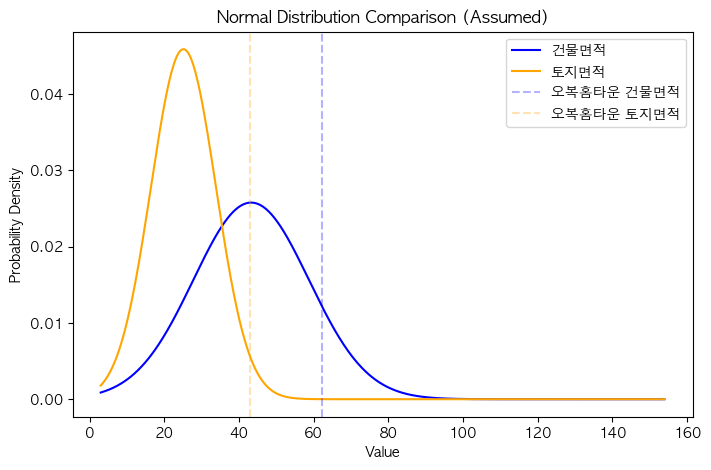

<Figure size 800x500 with 1 Axes>

In [49]:
## 지금 이 코드는 이해하지 않아도 됩니다! 복붙해서 그림만 봐주세요

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data_A = multiplex_house_df_cleaned['건물면적']
data_B = multiplex_house_df_cleaned['토지면적']


# 두 변수의 평균과 표준편차
mu_A, sigma_A = np.mean(data_A), np.std(data_A)
mu_B, sigma_B = np.mean(data_B), np.std(data_B)

# x 범위 (두 분포를 모두 포함하도록)
x = np.linspace(
    min(min(data_A),min(data_B)),
    max(max(data_A),max(data_B)),
    500
)

# PDF 계산
pdf_A = norm.pdf(x, mu_A, sigma_A)
pdf_B = norm.pdf(x, mu_B, sigma_B)

# 시각화
plt.figure(figsize=(8,5))
plt.plot(x, pdf_A, label="건물면적",color ='blue')
plt.plot(x, pdf_B, label="토지면적",color ='orange')

plt.axvline(x=target['건물면적'].values,linestyle = "--", alpha=0.3, label="오복홈타운 건물면적",color ='blue')
plt.axvline(x=target['토지면적'].values,linestyle = "--", alpha=0.3, label="오복홈타운 토지면적",color='orange')


plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Normal Distribution Comparison (Assumed)")
plt.legend()
plt.show()

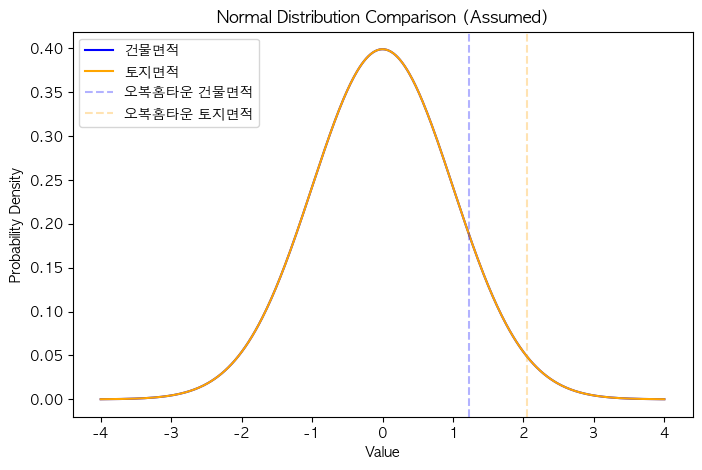

<Figure size 800x500 with 1 Axes>

In [50]:
## 지금 이 코드는 이해하지 않아도 됩니다! 복붙해서 그림만 봐주세요

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data_A = multiplex_house_df_cleaned['건물면적_표준화']
data_B = multiplex_house_df_cleaned['토지면적_표준화']
# 두 변수의 평균과 표준편차
mu_A, sigma_A = 0,1
mu_B, sigma_B = 0,1

# x 범위 (두 분포를 모두 포함하도록)
x = np.linspace(
    -4,4,500
)

# PDF 계산
pdf_A = norm.pdf(x, mu_A, sigma_A)
pdf_B = norm.pdf(x, mu_B, sigma_B)

# 시각화
plt.figure(figsize=(8,5))
plt.plot(x, pdf_A, label="건물면적",color ='blue')
plt.plot(x, pdf_B, label="토지면적",color ='orange')

plt.axvline(x=target['건물면적_표준화'].values,linestyle = "--", alpha=0.3, label="오복홈타운 건물면적",color ='blue')
plt.axvline(x=target['토지면적_표준화'].values,linestyle = "--", alpha=0.3, label="오복홈타운 토지면적",color='orange')


plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Normal Distribution Comparison (Assumed)")
plt.legend()
plt.show()


- 연립다세대주택 중에서 오복홈타운의 건물 면적과 토지면적은 평균보다 높은가?  
  - 그렇다
- 만약 둘 다 평균보다 높다고 나온다면, 오복홈타운의 건물면적과 토지면적 중 어떤 면적이 평균에서 더 멀리 떨어져있을까?
  - 토지면적이 더 멀리 떨어졌다. 표준화 점수를 비교해보니 토지면적의 표준화점수가 건물면적의 표준화 점수보다 높게 나왔다. 토지면적이 토지면적의 평균에서 떨어진 정도가 건물면적이 건물면적의 평균에서 떨어진 정도보다 더 크다는 걸 의미한다. 

## 신뢰구간 구하기

In [52]:
multiplex_house_df

,건물명,자치구코드,자치구명,법정동코드,법정동명,층,건물용도,물건금액,건물면적,토지면적,계약일
0,성원빌라(86-125),11380,은평구,10200,녹번동,4.00,연립다세대,16400,53.07,25.00,2024-10-14
1,팔팔빌라,11500,강서구,10300,화곡동,2.00,연립다세대,35000,39.24,27.00,2024-10-14
2,다솔시티하임,11560,영등포구,11100,당산동1가,5.00,연립다세대,30000,29.54,14.00,2024-10-14
9,진광,11500,강서구,10600,내발산동,1.00,연립다세대,15900,37.98,20.00,2024-10-14
11,오복홈타운,11590,동작구,10200,상도동,2.00,연립다세대,30000,62.30,43.00,2024-10-14
...,...,...,...,...,...,...,...,...,...,...,...
77516,세종에버그린(101동),11215,광진구,10700,화양동,8.00,연립다세대,30000,27.55,9.88,2023-01-24
77517,금석연립(170-33),11530,구로구,10700,개봉동,2.00,연립다세대,9740,53.61,124.00,2022-07-08
77518,금석연립(170-33),11530,구로구,10700,개봉동,1.00,연립다세대,9190,53.61,124.00,2022-07-08
77519,금석연립(170-33),11530,구로구,10700,개봉동,1.00,연립다세대,9190,53.61,124.00,2022-07-08


                건물명  자치구코드  자치구명  법정동코드   법정동명    층   건물용도   물건금액  건물면적  \
0      성원빌라(86-125)  11380   은평구  10200    녹번동 4.00  연립다세대  16400 53.07   
1              팔팔빌라  11500   강서구  10300    화곡동 2.00  연립다세대  35000 39.24   
2            다솔시티하임  11560  영등포구  11100  당산동1가 5.00  연립다세대  30000 29.54   
9                진광  11500   강서구  10600   내발산동 1.00  연립다세대  15900 37.98   
11            오복홈타운  11590   동작구  10200    상도동 2.00  연립다세대  30000 62.30   
...             ...    ...   ...    ...    ...  ...    ...    ...   ...   
77516  세종에버그린(101동)  11215   광진구  10700    화양동 8.00  연립다세대  30000 27.55   
77517  금석연립(170-33)  11530   구로구  10700    개봉동 2.00  연립다세대   9740 53.61   
77518  금석연립(170-33)  11530   구로구  10700    개봉동 1.00  연립다세대   9190 53.61   
77519  금석연립(170-33)  11530   구로구  10700    개봉동 1.00  연립다세대   9190 53.61   
77520  금석연립(170-33)  11530   구로구  10700    개봉동 2.00  연립다세대   9740 53.61   

        토지면적        계약일  
0      25.00 2024-10-14  
1      27.00 2024-10-14  
2      14.00 2024-10-

지금 우리가 알고 싶은 건 서울에 있는 모든 연립 다세대 주택의 물건금액 평균을 알아내는 것이다. <br>
하지만 우리는 약 2만개의 데이터만 가지고 있다. <br>
이 데이터를 가지고, 연립 다세대 주택의 물건 금액 평균을 추정해보자. 

우선 건물명, 자치구, 법정동, 층이 일치하는 데이터는 계약일이 가장 최근인 데이터만 남긴다. 

In [55]:
# 같은 매물 데이터는 중복 제거
multiplex_house_only_df = multiplex_house_df.sort_values(['건물명','자치구코드','법정동코드','층','계약일']).drop_duplicates(subset=['건물명','자치구코드','법정동코드','층'],keep='last')

In [56]:
multiplex_house_only_df

,건물명,자치구코드,자치구명,법정동코드,법정동명,층,건물용도,물건금액,건물면적,토지면적,계약일
63288,(1-10),11410,서대문구,11700,연희동,3.00,연립다세대,27500,57.66,18.00,2024-03-08
53314,(1-109),11170,용산구,10200,용산동2가,3.00,연립다세대,52000,72.95,73.95,2024-04-13
74777,(1-12),11305,강북구,10300,수유동,5.00,연립다세대,49500,63.82,44.35,2024-01-07
35213,(1-1382),11170,용산구,10200,용산동2가,1.00,연립다세대,30000,30.79,24.00,2024-06-15
69068,(1-155),11200,성동구,10900,금호동1가,-1.00,연립다세대,21200,58.32,18.51,2024-02-07
...,...,...,...,...,...,...,...,...,...,...,...
34419,힐하우스(150-143),11215,광진구,10100,중곡동,5.00,연립다세대,21500,41.96,15.00,2024-06-17
15082,힐하우스(200-413),11440,마포구,12500,성산동,2.00,연립다세대,28000,34.45,21.00,2024-08-05
7653,힐하우스(200-413),11440,마포구,12500,성산동,4.00,연립다세대,45000,41.60,25.00,2024-08-27
3454,힐하우스(377-12),11500,강서구,10300,화곡동,4.00,연립다세대,20500,29.96,14.00,2024-09-11


                 건물명  자치구코드  자치구명  법정동코드   법정동명     층   건물용도   물건금액  건물면적  \
63288         (1-10)  11410  서대문구  11700    연희동  3.00  연립다세대  27500 57.66   
53314        (1-109)  11170   용산구  10200  용산동2가  3.00  연립다세대  52000 72.95   
74777         (1-12)  11305   강북구  10300    수유동  5.00  연립다세대  49500 63.82   
35213       (1-1382)  11170   용산구  10200  용산동2가  1.00  연립다세대  30000 30.79   
69068        (1-155)  11200   성동구  10900  금호동1가 -1.00  연립다세대  21200 58.32   
...              ...    ...   ...    ...    ...   ...    ...    ...   ...   
34419  힐하우스(150-143)  11215   광진구  10100    중곡동  5.00  연립다세대  21500 41.96   
15082  힐하우스(200-413)  11440   마포구  12500    성산동  2.00  연립다세대  28000 34.45   
7653   힐하우스(200-413)  11440   마포구  12500    성산동  4.00  연립다세대  45000 41.60   
3454    힐하우스(377-12)  11500   강서구  10300    화곡동  4.00  연립다세대  20500 29.96   
28006    힐하우스(5-211)  11170   용산구  11900    효창동  3.00  연립다세대  77000 51.27   

       토지면적        계약일  
63288 18.00 2024-03-08  
53314 73.95 2024-04-13  


In [60]:
sample_data = multiplex_house_only_df['물건금액']

#표본 개수 
n = len(sample_data)

#표본의 평균
sample_mean = np.mean(sample_data)

#표본의 표준편차
s = np.std(sample_data,ddof=1)

#표준오차의 근사값
se = s/np.sqrt(n)

# 신뢰구간 구하기
stats.t.interval(confidence=0.95, df = n-1, loc = sample_mean , scale=se)

(np.float64(34671.77286052314), np.float64(35596.37837881512))

95% 신뢰수준에서 서울 연립 다세대 주택의 물건금액 평균은 34,671만원에서 35,596만원 사이에 있다. 